In [3]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [26]:
df = pd.read_csv('/home/jovyan/work/projekti-2-team-fox/laurijutut/projekti2.csv')

df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 10532
uniques in y 7899
uniques in z 3
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100 400   0]
uniques in q [0]
------------------------------
Number of nodes: 32
------------------------------
Outliers

Data with outliers:  13890906
Ouliers removed:     376791
Data after:  13514115
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


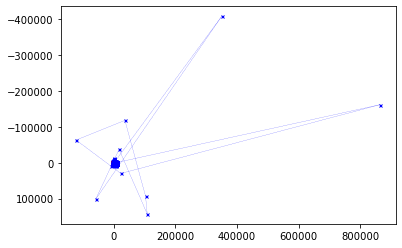

In [27]:

df = find_outliers(df)
%time

In [28]:
%time
df = clean_dataframe(df)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [29]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['index'], axis = 1)

In [30]:
df

,node_id,timestamp,x,y
0,1,2020-06-24 15:20:08.533,2762,-257
1,1,2020-06-24 15:20:08.620,2870,-344
2,1,2020-06-24 15:20:09.623,2916,-344
3,1,2020-06-24 15:20:09.623,2894,-254
4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...
11697661,32,2020-05-31 21:59:14.541,593,988
11697662,32,2020-05-31 21:59:28.456,701,668
11697663,32,2020-05-31 21:59:39.968,744,1130
11697664,32,2020-05-31 21:59:46.893,799,204


In [31]:
df['viikonpäivä'] = df.timestamp.dt.dayofweek
df['kellonaika'] = df.timestamp.dt.time

df

,node_id,timestamp,x,y,viikonpäivä,kellonaika
0,1,2020-06-24 15:20:08.533,2762,-257,2,15:20:08.533000
1,1,2020-06-24 15:20:08.620,2870,-344,2,15:20:08.620000
2,1,2020-06-24 15:20:09.623,2916,-344,2,15:20:09.623000
3,1,2020-06-24 15:20:09.623,2894,-254,2,15:20:09.623000
4,1,2020-06-24 15:20:10.116,2888,-188,2,15:20:10.116000
...,...,...,...,...,...,...
11697661,32,2020-05-31 21:59:14.541,593,988,6,21:59:14.541000
11697662,32,2020-05-31 21:59:28.456,701,668,6,21:59:28.456000
11697663,32,2020-05-31 21:59:39.968,744,1130,6,21:59:39.968000
11697664,32,2020-05-31 21:59:46.893,799,204,6,21:59:46.893000


In [32]:
corrMatrix = df.corr()
print (corrMatrix)

              node_id         x         y  viikonpäivä
node_id      1.000000 -0.117396  0.002631     0.007090
x           -0.117396  1.000000 -0.192502    -0.002923
y            0.002631 -0.192502  1.000000     0.000251
viikonpäivä  0.007090 -0.002923  0.000251     1.000000


In [33]:
import seaborn as sn
import matplotlib.pyplot as plt


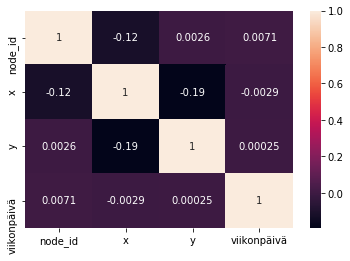

In [34]:
sn.heatmap(corrMatrix, annot=True)
plt.show()